# HW0 - Image and Signal processing 

Thibault Schowing

Master in Bioinformatics and computational biology



## Exercice 1

0

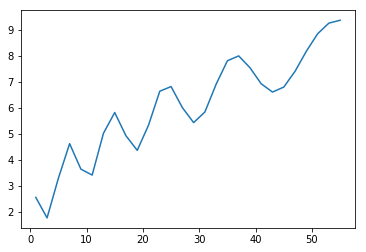

In [42]:
import numpy as np
import matplotlib.pyplot as plt


def ex_0(a,b,c):
    if(a < 0 | b < 0):
        return -1
    else:
        # a = start, b = end, c = space 
        x = np.arange(a,b+1,c)
        y = np.cos(x * np.exp(-x/100)) + np.sqrt(x) + 1
        plt.plot(x,y)
        return 0
        
ex_0(1,55,2)

## Exercise 2

Useful ressources:
https://scikit-image.org/
https://scipy-lectures.org/advanced/image_processing/

Forum help
https://stackoverflow.com/questions/12138339/finding-the-x-y-indexes-of-specific-r-g-b-color-values-from-images-stored-in

Numpy and images
https://www.pythoninformer.com/python-libraries/numpy/numpy-and-images/


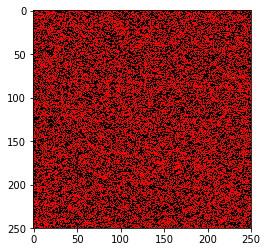

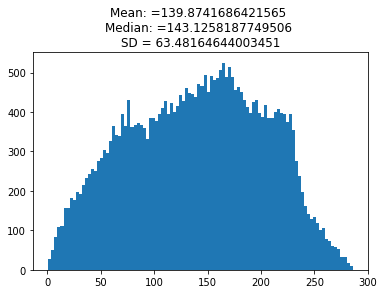

End.


In [2]:
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import random

# To verify distances
from scipy.spatial import distance


def display_img(img):
        # If image is a file or to display it: 
    
    %matplotlib inline 
    plt.imshow(img)
    plt.show()
    
    #img = Image.fromarray(t, 'RGB')
    #img.save('img.png')
    #img.show()

def create_image(n,m):
    
    # Next time - try to use "nditer" -> complex but use vectorization
    
    # Create a n x m image of black pixels
    t = np.zeros(shape=(n,m,3), dtype=np.uint8)
    
    # Randomly change the R between 0 and 255
    for i in range(n):
        for j in range(m):
            t[i,j] = [np.random.choice([0,255]),0,0]
    
    # Insert a random green pixel
    t[np.random.randint(0,n),np.random.randint(0,m)] = [0,255,0]

    return t

def find_pixels(img, pixel_values):
    # Use if image is a file
    #img = Image.open(path, mode='r')
    #img = np.array(img)
    
    
    # Get the coordinates (x and y separately) of the pixels matching the pixel_value
    coord_raw = np.where(np.all(img == pixel_values, axis = -1))
    
    # np.where returns a tuple with two vectors containing x and y coordinates 
    # Here they are put in a single matrix
    ret_coord = np.column_stack((coord_raw[0],coord_raw[1]))
    
    return(ret_coord)
    
# Take an image and compute the distances between the one green pixel and all the red ones. 
def compute_distances(img):
    
    # Get the coordinates of the green pixel and all the red ones
    green = [0,255,0]
    red = [255,0,0]
    coord_green = find_pixels(img, green)
    coord_red = find_pixels(img, red)
    
    # Calculate distances between the green pixel and all the red ones
    
    #                coord_red[...,0] = all y                    coord_red[...,1] = all x
    dists = np.sqrt((coord_red[...,0] - coord_green[0][0])**2 + (coord_red[...,1] - coord_green[0][1])**2)
    
    
    #function to confirm results from scipy.spatial - the two histograms are plot later
    conf_dists = distance.cdist(coord_green, coord_red, 'euclidean')
    
    # Return both calculated distances in a vector form (flattened in 1 dimention)
    return (dists.flatten(), conf_dists.flatten())



# Plot the given vector in a histogram with 100 bins
def display_results(dists):
    # Displaying requested values
    mean = np.mean(dists)
    median = np.median(dists)
    sd = np.std(dists)
    
    # mandatory for Jupyter notebook
    %matplotlib inline 
    titlestr = 'Mean: ='+ str(mean)+' \nMedian: ='+ str(median)+' \nSD = '+ str(sd)
    plt.title(titlestr)
    plt.hist(dists, bins = 100)
    plt.show()
    return 1


n = 250
m = 250

img = create_image(n,m)
display_img(img)
dists = compute_distances(img)
display_results(dists[0])

# Confirmation from library (not necessary)
# display_results(dists[1])

print("End.")





In [3]:
#np.sqrt(np.sum((point-points)**2)) - x et y vectors of 

# Exercise 3

Using the image stopturnsigns.jpg from ILIAS, try to find the threshold values tmin, tmax, such that a mask m contains only pixels of the stop sign. An example of such a boolean binary mask can be seen below.

Tmin = [230,30,50]


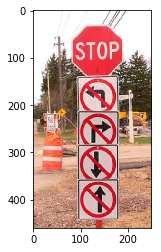

Binary image - is red


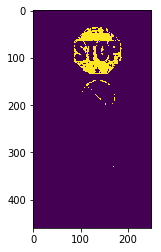

Red cluster shape
(460, 250)


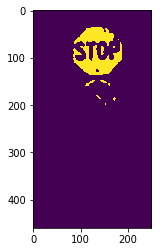

disp i


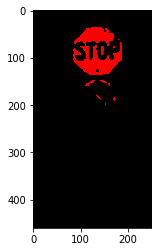

1

In [4]:
#import cv2
import numpy as np
from scipy import ndimage
#from PIL import Image
import matplotlib.pyplot as plt


from matplotlib.image import imread


def open_image_nparray(path):
    # Use if image is a file
    #img = Image.open(path, mode='r')
    img = imread(path)
    img = np.array(img)
    
    return img

def display_img(img):
        # If image is a file or to display it: 
    
    %matplotlib inline 
    plt.imshow(img)
    plt.show()
    
    #img = Image.fromarray(t, 'RGB')
    #img.save('img.png')
    #img.show()
    return 1

# return boolean, true if pixel is considered red, else false
def is_red(color):
    # color : [rrr,ggg,bbb]
    return (color[0] > 230 and color[0] < 255) and (color[1] > 30 and color[1] < 65) and (color[2] < 95 and color[2] > 50)
    #return color[0] > 220 & color[1] < 80 & color[2] < 100


# number of red pixels in image
def nb_red(tbl):
    #print(tbl.shape[:2])
    return np.sum(tbl > 0)

# convert an image to 0/1 array according to boolean function passed
def convert_binary(img, f):
     # Create an array with 1 or 0 depending if the color is considered red or not
    r = []
    for line in img:
        for pixel in line:
            r.append(f(pixel))
            
    r = np.asarray(r)
    shape = img.shape
    r.shape =(shape[0], shape[1])
    return r



# Convert back a binary 0/1 picture to RGB np.array
def convert_red(img):
    rb = []
    for line in img:
        for pix in line:
            col = [255,0,0] if pix == 1 else [0,0,0]
            rb.append(col)
    rb = np.asarray(rb)
    shape = img.shape
    rb.shape =(shape[0], shape[1],3)
    return rb





# image must be a 0/1 np.array
def sliding_count(image, stepSize, windowSize):
    
    count = np.zeros(image.shape)
    
    # Set count to 1 where pixel is already red - possible to use multiplication
    #count = np.where(image > 0, 1, 0)
    
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            window = image[y:y + windowSize[1], x:x + windowSize[0]]
            
            # Number of red pixels in the window
            tmp_nb_red = nb_red(window)
            #print("Nb red pixels: ", tmp_nb_red)
            # add the nb of red pixels in the window to the count table
            count[y:y + windowSize[1], x:x + windowSize[0]] += tmp_nb_red
    
    return count

# Detects a big red area.
# To customize: modify is_red() to change sensitivity to red color
# change the sliding window parameters 
# change the threshold
def red_detect(img, threshold, windowSize, stepSize,  nb_pass = 1):
    
    #TODO: instead of converting to 0/1 -> sliding window fills with mean of red
    
    r = convert_binary(img, is_red)
    
    # Img with only "red" pixels
    print("Binary image - is red")
    display_img(r)
    
    
    count = sliding_count(r, stepSize, windowSize)
    img_red_cluster = np.where(count > threshold, 1, 0)
    
    print("Red cluster shape")
    print(img_red_cluster.shape)
    display_img(img_red_cluster)
    
    return img_red_cluster

# https://www.pyimagesearch.com/2015/03/23/sliding-windows-for-object-detection-with-python-and-opencv/ 




img = open_image_nparray('stopturnsigns.jpg')
display_img(img)



windowSize = [4,4]
stepSize = 1
threshold = 70

RB_img = red_detect(img, threshold, windowSize, stepSize)
i = convert_red(RB_img)
print("disp i")
display_img(i)



JPEG (250, 460) RGB
None (250, 460) HSV


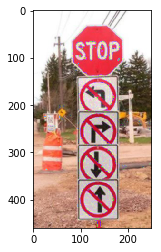

ValueError: missing method data

In [19]:
from PIL import Image, ImageFilter
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt




def display_img(img):
        # If image is a file or to display it: 
    
    %matplotlib inline 
    plt.imshow(img)
    plt.show()
    
    #img = Image.fromarray(t, 'RGB')
    #img.save('img.png')
    #img.show()
    return 1

im = Image.open("stopturnsigns.jpg")
print(im.format, im.size, im.mode)

im = im.convert("HSV")
print(im.format, im.size, im.mode)

out = im.filter(ImageFilter.SMOOTH_MORE)
display_img(out)

#out.getchannel(0).show()

transf = im.transform(im.size, Image.NEAREST, data=None, resample=0, fill=1, fillcolor=None)


# Exercise 4


RMSE between two different tables
0.39062063645469
RMSE between two same tables
0.0
RMSE between one table and the same with an offset of 2
2.0
RMSE between f(x) and g(x)
9.758643853752274
Optimal alpha:  0.13999999999999999
With RMSE:  1.9733237102303085


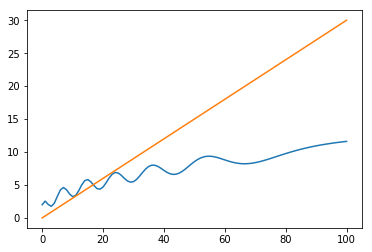

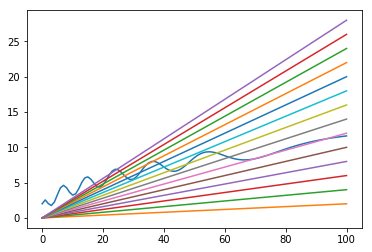

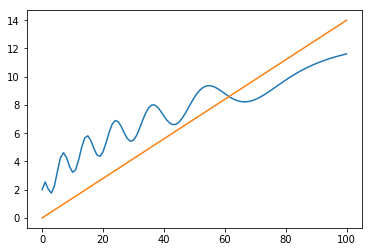

In [47]:
import numpy as np
import random
import matplotlib.pyplot as plt

def rmse(a, b):
    return np.sqrt(((a - b) ** 2).mean())

x = np.random.rand(100)
y = np.random.rand(100)

print("RMSE between two different tables")
print(rmse(x,y))

print("RMSE between two same tables")
print(rmse(x,x))

print("RMSE between one table and the same with an offset of 2")
print(rmse(x,np.add(x,2)))



x = np.arange(0,101,1)
y = np.cos(x * np.exp(-x/100)) + np.sqrt(x) + 1
g = 0.3 * x


%matplotlib inline 
plt.figure(0)
plt.plot(x,y)
plt.plot(x,g)

print("RMSE between f(x) and g(x)")
print(rmse(y, g))

errors = []
alphas = []


plt.figure(1)
plt.plot(x,y)
for a in np.arange(0.02, 0.3, 0.02):
    g = a * x
    #print(rmse(y,g))
    errors.append((rmse(y,g)))
    alphas.append(a)
    plt.plot(x,g)


min_index = errors.index(min(errors))
alpha = alphas[errors.index(min(errors))]
print("Optimal alpha: ", alpha)
print("With RMSE: ", errors[min_index])


plt.figure(2)
plt.plot(x,y)
plt.plot(x, alpha * x)